<a id = '5.5'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Flight Price Prediction</strong></p>

In [ ]:
#importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


# Importing dataset
After loading the data into a Pandas DataFrame, it is checked for NULL values and dropped if necessary  

In [ ]:
pip install openpyxl

In [ ]:
#importing data
df=pd.read_excel('/content/Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.info()   #information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
#describe about the data
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
df.shape

(10683, 11)

In [ ]:
#finding the null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### **Only 2 missing values are observed,we can directly drop these,as these are very less.**

In [ ]:
#drop the nullvalues
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df[df.duplicated(keep='first')]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [ ]:
df.drop_duplicates()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


<a id = '5.5'></a>
<p style = "font-size : 25px; color : 'blue' ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Data Cleaning</strong></p>

In [ ]:
df.dtypes # datatypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

####The 'Date_of_journey', 'Arrival__Time' and 'Dep_time' column data is of datatype Object. It would be much easier to handle them in Datetime/Int. 


In [ ]:
def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])

In [ ]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

#### Splitting 'Dep_Time' and 'Arrival_Time' into their respective Hour and Minute column.

In [ ]:
df['Dep_Time_hour']=df['Dep_Time'].dt.hour
df['Dep_Time_min']=df['Dep_Time'].dt.minute
df['Arrival_Time_hour']=df['Arrival_Time'].dt.hour
df['Arrival_Time_min']=df['Arrival_Time'].dt.minute

####Exactracting Date and Month from 'Date_of_Journey'.
#####Year is excluded, as the entire date is of year 2019
##### According to common concecption that weekend flights are costlier, lets check that through our data. (Days encoded as Monday=0 and Sunday=6)


In [ ]:
df['journey_day']=df['Date_of_Journey'].dt.day
df['journey_month']=df['Date_of_Journey'].dt.month
df['journey_weekday']=df['Date_of_Journey'].dt.dayofweek

In [ ]:
def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)

In [ ]:
# df.drop('Date_of_Journey', axis=1, inplace=True)
# df.drop('Dep_Time', axis=1, inplace=True)
# df.drop('Arrival_Time', axis=1, inplace=True)
drop_col(df,'Date_of_Journey')
drop_col(df,'Dep_Time')
drop_col(df,'Arrival_Time')


In [ ]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Duration             object
Total_Stops          object
Additional_Info      object
Price                 int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
journey_day           int64
journey_month         int64
journey_weekday       int64
dtype: object

In [ ]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,journey_day,journey_month,journey_weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,20,1,10,24,3,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,50,13,15,5,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,25,4,25,6,9,4
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,18,5,23,30,5,12,3
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,16,50,21,35,3,1,3


##### Applying pre-processing on duration column,to convert it into total flight time in minutes.

In [ ]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]

In [ ]:
df['Duration']=duration

In [ ]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]
    



In [ ]:
df['dur_hour']=df['Duration'].apply(hour)
df['dur_hour'] = df['dur_hour'].astype(int)

df['dur_min']=df['Duration'].apply(minutes)
df['dur_min'] = df['dur_min'].astype(int)

In [ ]:
df['dur_min']=df['dur_min']+df['dur_hour']*60

In [ ]:
#Dropping 'dur_hour' and 'duration' columns
df.drop('dur_hour', axis=1, inplace=True)
df.drop('Duration', axis=1, inplace=True)

In [ ]:
df.rename(columns = {'dur_min':'Duration'}, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  object
 1   Source             10682 non-null  object
 2   Destination        10682 non-null  object
 3   Route              10682 non-null  object
 4   Total_Stops        10682 non-null  object
 5   Additional_Info    10682 non-null  object
 6   Price              10682 non-null  int64 
 7   Dep_Time_hour      10682 non-null  int64 
 8   Dep_Time_min       10682 non-null  int64 
 9   Arrival_Time_hour  10682 non-null  int64 
 10  Arrival_Time_min   10682 non-null  int64 
 11  journey_day        10682 non-null  int64 
 12  journey_month      10682 non-null  int64 
 13  journey_weekday    10682 non-null  int64 
 14  Duration           10682 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 1.3+ MB


In [ ]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,journey_day,journey_month,journey_weekday,Duration
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,22,20,1,10,24,3,6,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,50,13,15,5,1,5,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,25,4,25,6,9,4,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,18,5,23,30,5,12,3,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,16,50,21,35,3,1,3,285


In [ ]:
# drop_col(df,'Duration')

In [ ]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
journey_day           int64
journey_month         int64
journey_weekday       int64
Duration              int64
dtype: object

## Check For Outliers 


In [ ]:
def plot(data,col):
    plt.figure(figsize=(20,12))
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(np.log(data[col]+0.001),ax=ax1)
    sns.boxplot(data[col],ax=ax2)

<Figure size 1440x864 with 0 Axes>

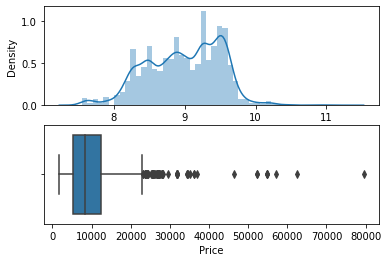

In [ ]:
plot(df,'Price')

###  Handling outliers:
#### As there is some outliers in price feature,so we replace it  with median.

In [ ]:
IQR=df['Price'].quantile(0.75)-df['Price'].quantile(0.25)

In [ ]:
upper_outlier_val=df['Price'].quantile(0.75)+1.5*IQR
print("Upper Limit of outlier: {}".format(upper_outlier_val))

Upper Limit of outlier: 23017.0


In [ ]:
print("Total outliers in dataset:{}".format(df[df['Price']>upper_outlier_val].shape[0]))

Total outliers in dataset:94


In [ ]:
df['Price']=np.where(df['Price']>=upper_outlier_val,df['Price'].quantile(0.5),df['Price'])

<Figure size 1440x864 with 0 Axes>

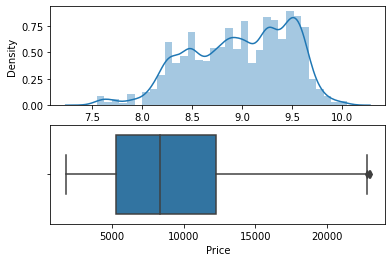

In [ ]:
plot(df,'Price')

#### Finding the categorical value

In [ ]:
column=[column for column in df.columns if df[column].dtype=='object']
column

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

#### Finding the continuous value

In [ ]:
continuous_col =[column for column in df.columns if df[column].dtype!='object']
continuous_col

['Price',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'journey_day',
 'journey_month',
 'journey_weekday',
 'Duration']

# Handling categorical data




### We are using two main Encoding Techniques to covert Categorical data into some numerical format

#### Nominal data -- Data that are not in any order -->one hot encoding
#### ordinal data -- Data are in order --> labelEncoder

In [ ]:
categorical = df[column]

In [ ]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [ ]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [ ]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)

In [ ]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [ ]:
#encoding of Source city column
source=pd.get_dummies(categorical['Source'],drop_first=True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [ ]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [ ]:
#encoding of destination column
destination=pd.get_dummies(categorical['Destination'],drop_first=True)
destination.head()
destination.rename(columns = {'Delhi':'Delhi_A'}, inplace = True)
destination.rename(columns = {'Kolkata':'Kolkata_A'}, inplace = True)

In [ ]:
# now work on route column
categorical['Route'].value_counts()


DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → JDH → JAI → DEL → HYD       1
BOM → GOI → HYD                   1
BLR → BOM → IXC → DEL             1
CCU → IXZ → MAA → BLR             1
BLR → HBX → BOM → AMD → DEL       1
Name: Route, Length: 128, dtype: int64

In [ ]:
categorical['Route1']=categorical['Route'].str.split('→').str[0]
categorical['Route2']=categorical['Route'].str.split('→').str[1]
categorical['Route3']=categorical['Route'].str.split('→').str[2]
categorical['Route4']=categorical['Route'].str.split('→').str[3]
categorical['Route5']=categorical['Route'].str.split('→').str[4]

In [ ]:
categorical.head(10)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN
5,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info,CCU,BLR,NaN,NaN,NaN
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,BLR,BOM,DEL,NaN,NaN
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,BLR,BOM,DEL,NaN,NaN
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,BLR,BOM,DEL,NaN,NaN
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,DEL,BOM,COK,NaN,NaN


In [ ]:
drop_col(categorical,'Route')

In [ ]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route1                 0
Route2                 0
Route3              3491
Route4              9116
Route5             10636
dtype: int64

In [ ]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [ ]:
for i in ['Route3', 'Route4', 'Route5']:
    categorical[i].fillna('None',inplace=True)

In [ ]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

In [ ]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route1 has total 5 categories
Route2 has total 45 categories
Route3 has total 30 categories
Route4 has total 14 categories
Route5 has total 6 categories


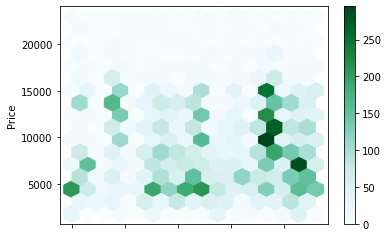

In [ ]:
df.plot.hexbin(x='Arrival_Time_hour',y='Price',gridsize=15)

In [ ]:
# Applying label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
# for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
#     categorical[i]=encoder.fit_transform(categorical[i])
cols=['Route1', 'Route2', 'Route3', 'Route4', 'Route5']
categorical[cols] = categorical[cols].apply(encoder.fit_transform)

In [ ]:
categorical.head(10)

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5
5,SpiceJet,Kolkata,Banglore,non-stop,No info,2,5,29,13,5
6,Jet Airways,Banglore,New Delhi,1 stop,In-flight meal not included,0,7,8,13,5
7,Jet Airways,Banglore,New Delhi,1 stop,No info,0,7,8,13,5
8,Jet Airways,Banglore,New Delhi,1 stop,In-flight meal not included,0,7,8,13,5
9,Multiple carriers,Delhi,Cochin,1 stop,No info,3,7,6,13,5


In [ ]:
drop_col(categorical,'Additional_Info')

In [ ]:
categorical['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
# encoding Total stops
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [ ]:
categorical['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [ ]:
drop_col(categorical,'Source')
drop_col(categorical,'Destination')
drop_col(categorical,'Airline')

<a id = '5.5'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>After all preprocessing, Our data is ready for the modeling</strong></p> 

In [ ]:

final_df=pd.concat([categorical,Airline,source,destination,df[continuous_col]],axis=1)

In [ ]:
final_df.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Kolkata,Mumbai,Cochin,Delhi_A,Hyderabad,Kolkata_A,New Delhi,Price,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,journey_day,journey_month,journey_weekday,Duration
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3897.0,22,20,1,10,24,3,6,170
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,7662.0,5,50,13,15,5,1,5,445
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,13882.0,9,25,4,25,6,9,4,1140
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,6218.0,18,5,23,30,5,12,3,325
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,13302.0,16,50,21,35,3,1,3,285


In [ ]:
pd.set_option('display.max_columns',33)
final_df.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Kolkata,Mumbai,Cochin,Delhi_A,Hyderabad,Kolkata_A,New Delhi,Price,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,journey_day,journey_month,journey_weekday,Duration
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3897.0,22,20,1,10,24,3,6,170
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,7662.0,5,50,13,15,5,1,5,445
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,13882.0,9,25,4,25,6,9,4,1140
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,6218.0,18,5,23,30,5,12,3,325
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,13302.0,16,50,21,35,3,1,3,285


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Stops                        10682 non-null  int64  
 1   Route1                             10682 non-null  int64  
 2   Route2                             10682 non-null  int64  
 3   Route3                             10682 non-null  int64  
 4   Route4                             10682 non-null  int64  
 5   Route5                             10682 non-null  int64  
 6   Air India                          10682 non-null  uint8  
 7   GoAir                              10682 non-null  uint8  
 8   IndiGo                             10682 non-null  uint8  
 9   Jet Airways                        10682 non-null  uint8  
 10  Jet Airways Business               10682 non-null  uint8  
 11  Multiple carriers                  10682 non-null  uin

#Analysis

### Airline vs Price Analysis

In [ ]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

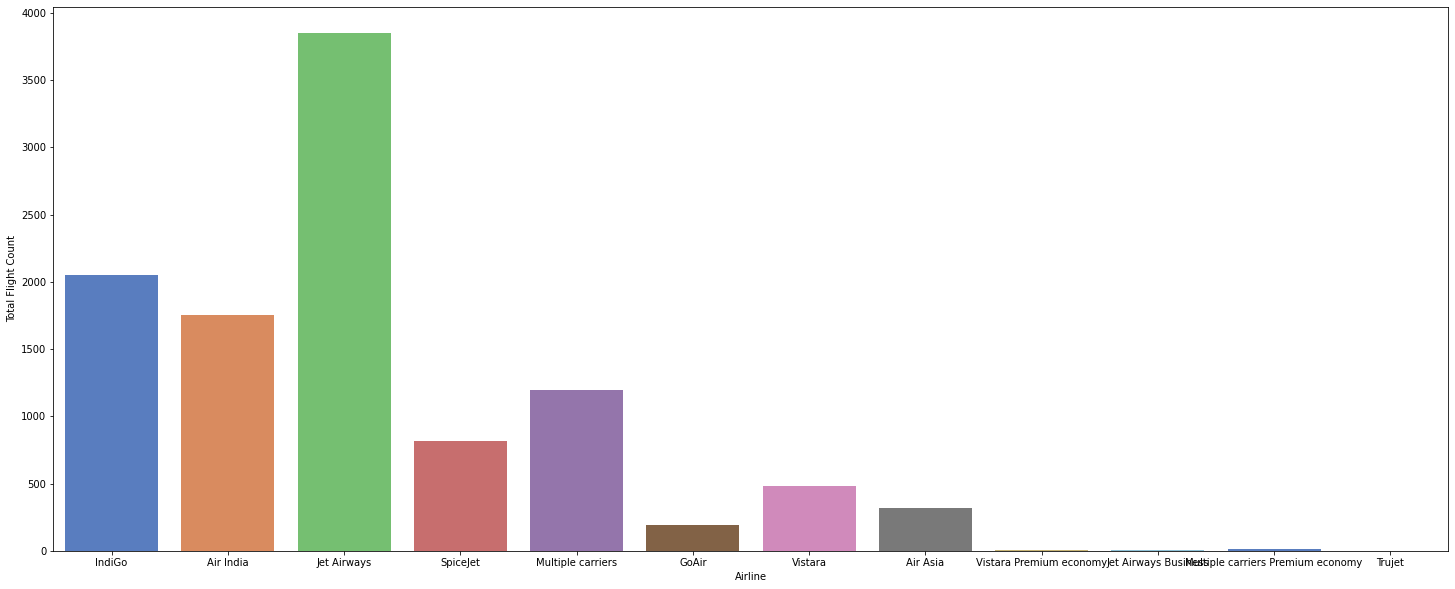

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(df['Airline'],palette='muted')
plt.xlabel('Airline')
plt.ylabel('Total Flight Count')
plt.show()

In [ ]:
# df['Airline'].value_counts().plot(kind='bar',figsize=(25,10),palette='muted')

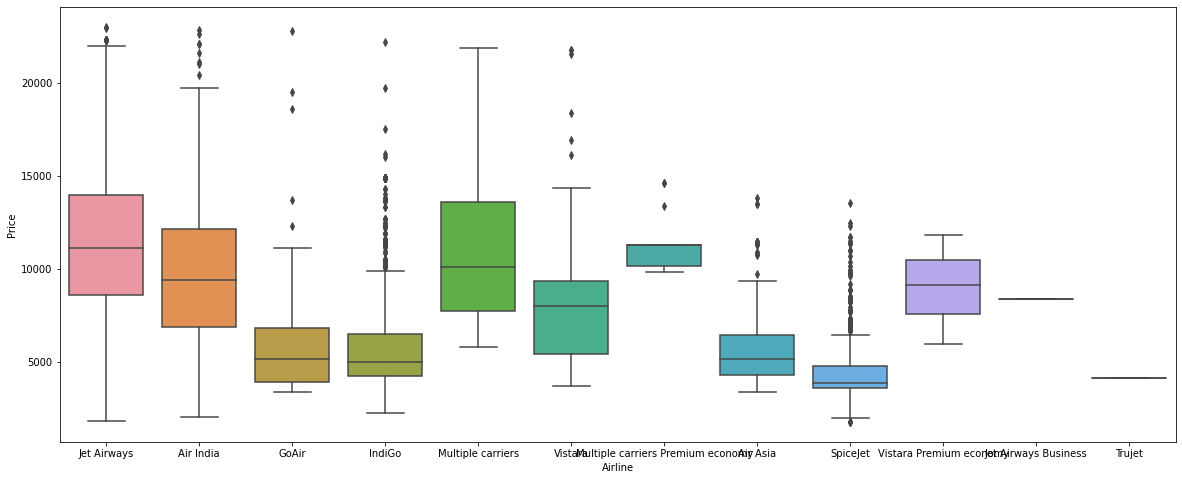

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))


### From graph we can see that Jet Airways have the high median Price (Who would have thought of thier fate in April 2019).

###Total Stops vs Price Analysis

In [ ]:
categorical['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

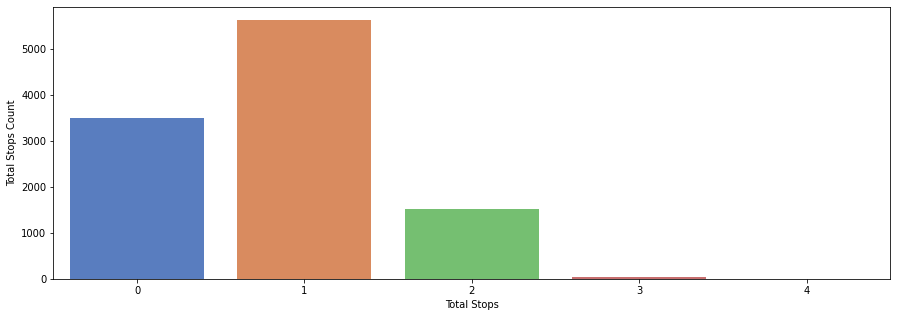

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(categorical['Total_Stops'],palette='muted')
plt.xlabel('Total Stops')
plt.ylabel('Total Stops Count')
plt.show()

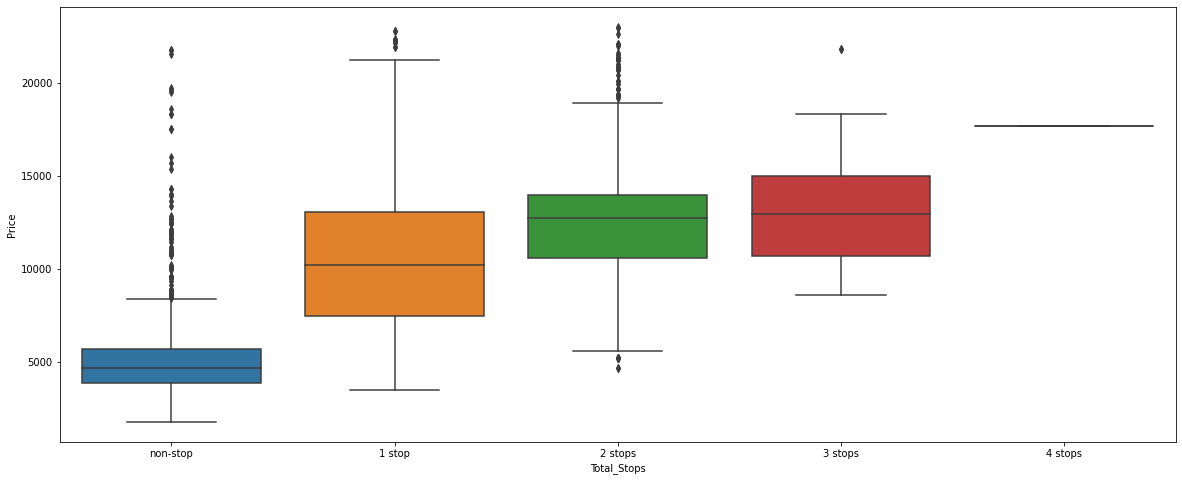

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Total_Stops',y='Price',data=df.sort_values('Price',ascending=True))

####The Median price of flights increases with increase in stops.

###Departure City vs Price

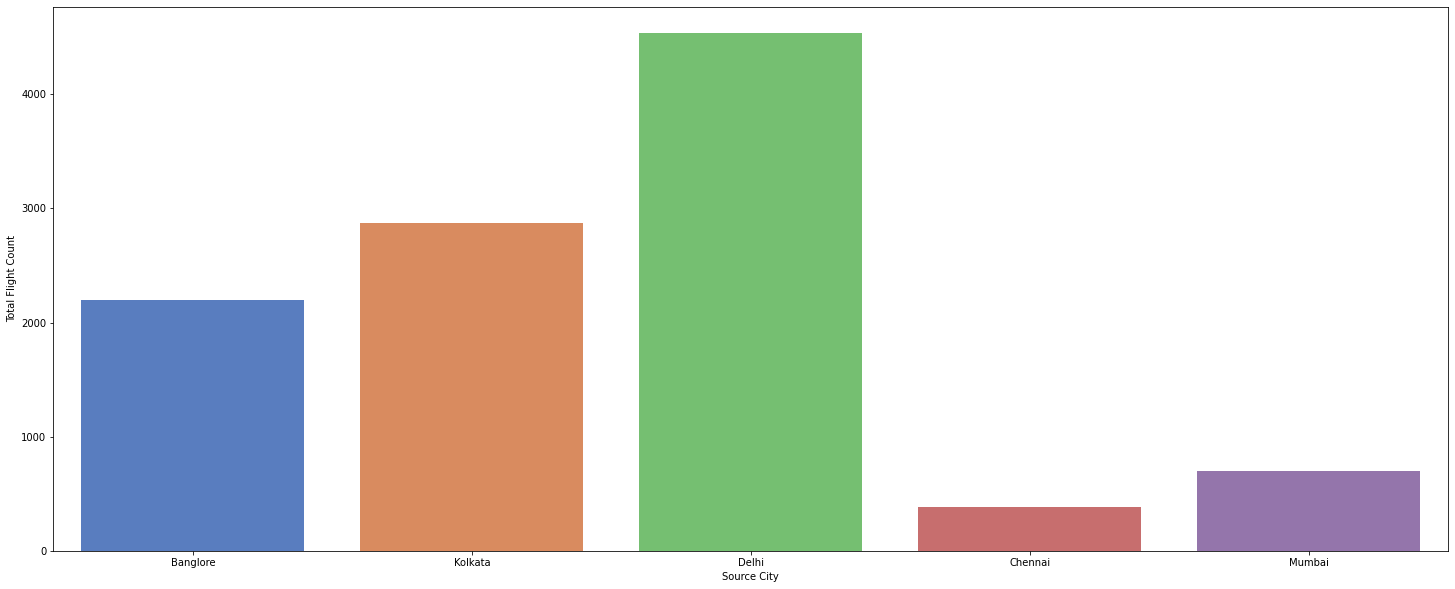

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(df['Source'],palette= "muted")
plt.xlabel('Source City')
plt.ylabel('Total Flight Count')
plt.show()

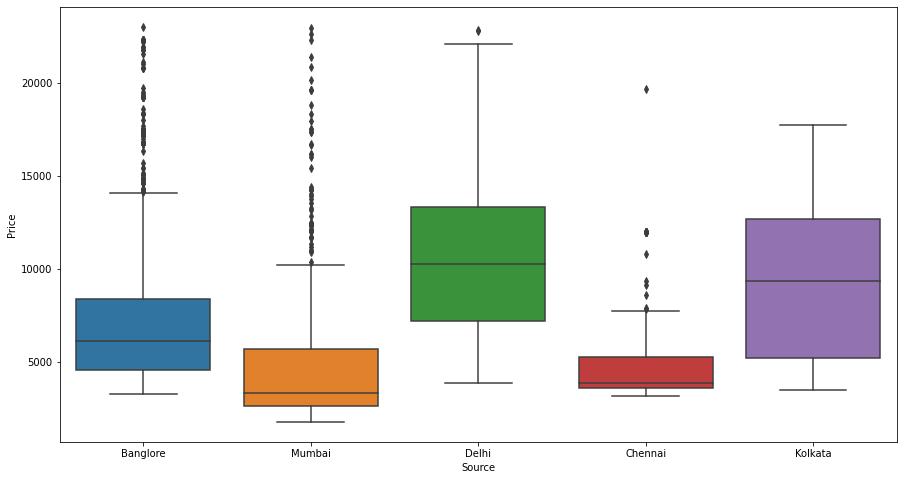

In [ ]:
#Source vs Price

plt.figure(figsize=(15,8))
# sns.catplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen')
sns.boxplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False))

###Destination City vs Price

In [ ]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

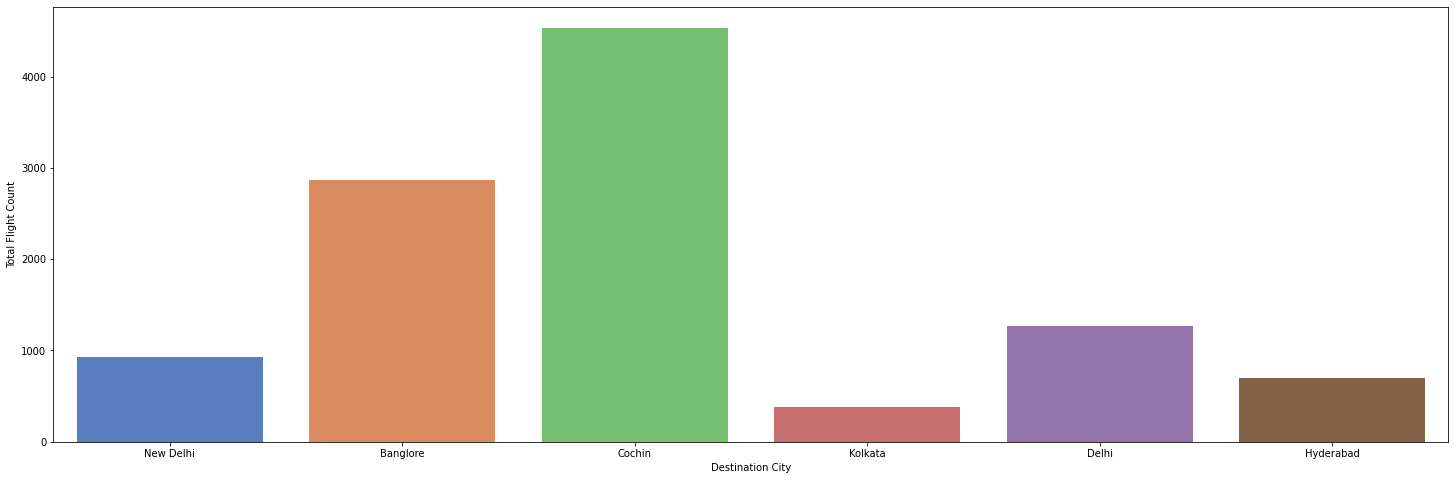

In [ ]:
plt.figure(figsize=(25,8))
sns.countplot(df['Destination'],palette= "muted")
plt.xlabel('Destination City')
plt.ylabel('Total Flight Count')
plt.show()

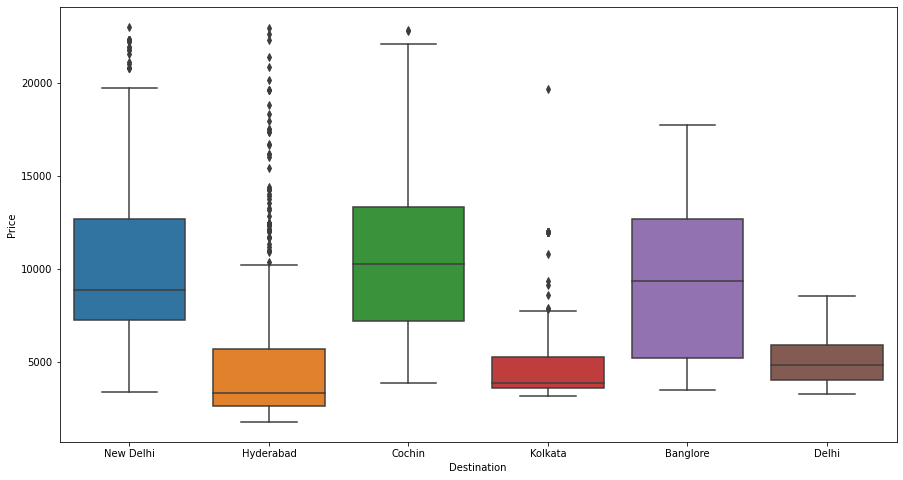

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))

###Day of the Week vs Price

In [ ]:
df['journey_weekday'].value_counts()

3    2290
4    1802
2    1598
0    1491
1    1236
5    1203
6    1062
Name: journey_weekday, dtype: int64

####Lets check on which day flight from Delhi to Banglore in the month of March is cheapest

In [ ]:
# df2=df[(df.Source =='Kolkata') & (df['Destination']=='Banglore') & (df['journey_month']==3) ]
df2=df[(df.Source =='Banglore') & (df['Destination']=='Delhi') & (df['journey_month']==3)]
df2.shape



(128, 15)

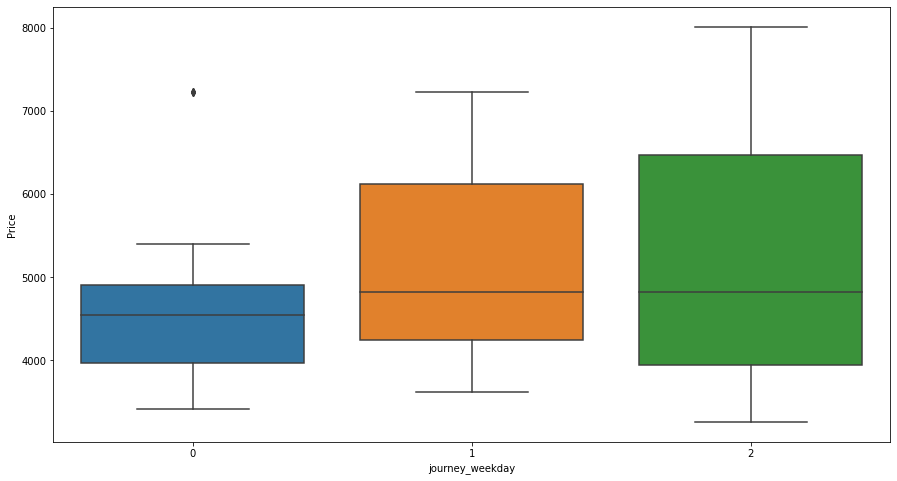

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='journey_weekday',y='Price',data=df2.sort_values('Price',ascending=False))

In [ ]:
df[(df.Source =='Banglore') & (df['Destination']=='Delhi') & (df['journey_month']==9)]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,journey_day,journey_month,journey_weekday,Duration
120,SpiceJet,Banglore,Delhi,BLR → DEL,non-stop,No info,3971.0,5,55,8,35,4,9,2,160
256,Air India,Banglore,Delhi,BLR → DEL,non-stop,No info,5228.0,10,0,12,45,5,9,3,165
299,Vistara,Banglore,Delhi,BLR → DEL,non-stop,No info,4878.0,17,0,19,35,5,9,3,155
332,GoAir,Banglore,Delhi,BLR → DEL,non-stop,No info,4239.0,20,55,23,40,4,9,2,165
360,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,8016.0,18,55,22,0,6,9,4,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10177,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,In-flight meal not included,4030.0,6,0,8,45,5,9,3,165
10202,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229.0,18,55,22,0,5,9,3,185
10243,GoAir,Banglore,Delhi,BLR → DEL,non-stop,No info,3898.0,20,55,23,40,6,9,4,165
10423,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3943.0,4,0,6,50,4,9,2,170


### Seprate the dataset in X and Y columns

In [ ]:
X=final_df.drop('Price',axis=1)
y=df['Price']

# Feature Selection 
It is about finding the best feature and having good relation with independent variable                                  
Issue of dimensionality reduction reduces.

For this we use mutual_info_classif

In [ ]:
from sklearn.feature_selection import mutual_info_classif


In [ ]:
# mutual_info_classif(X,y)

In [ ]:
imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
# imp

In [ ]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route2,2.760566
Duration,2.347764
Route3,2.282331
Total_Stops,2.152587
Route1,2.076963
Arrival_Time_hour,1.813413
Delhi,1.547623
Cochin,1.538018
Arrival_Time_min,1.518755
Route4,1.453076


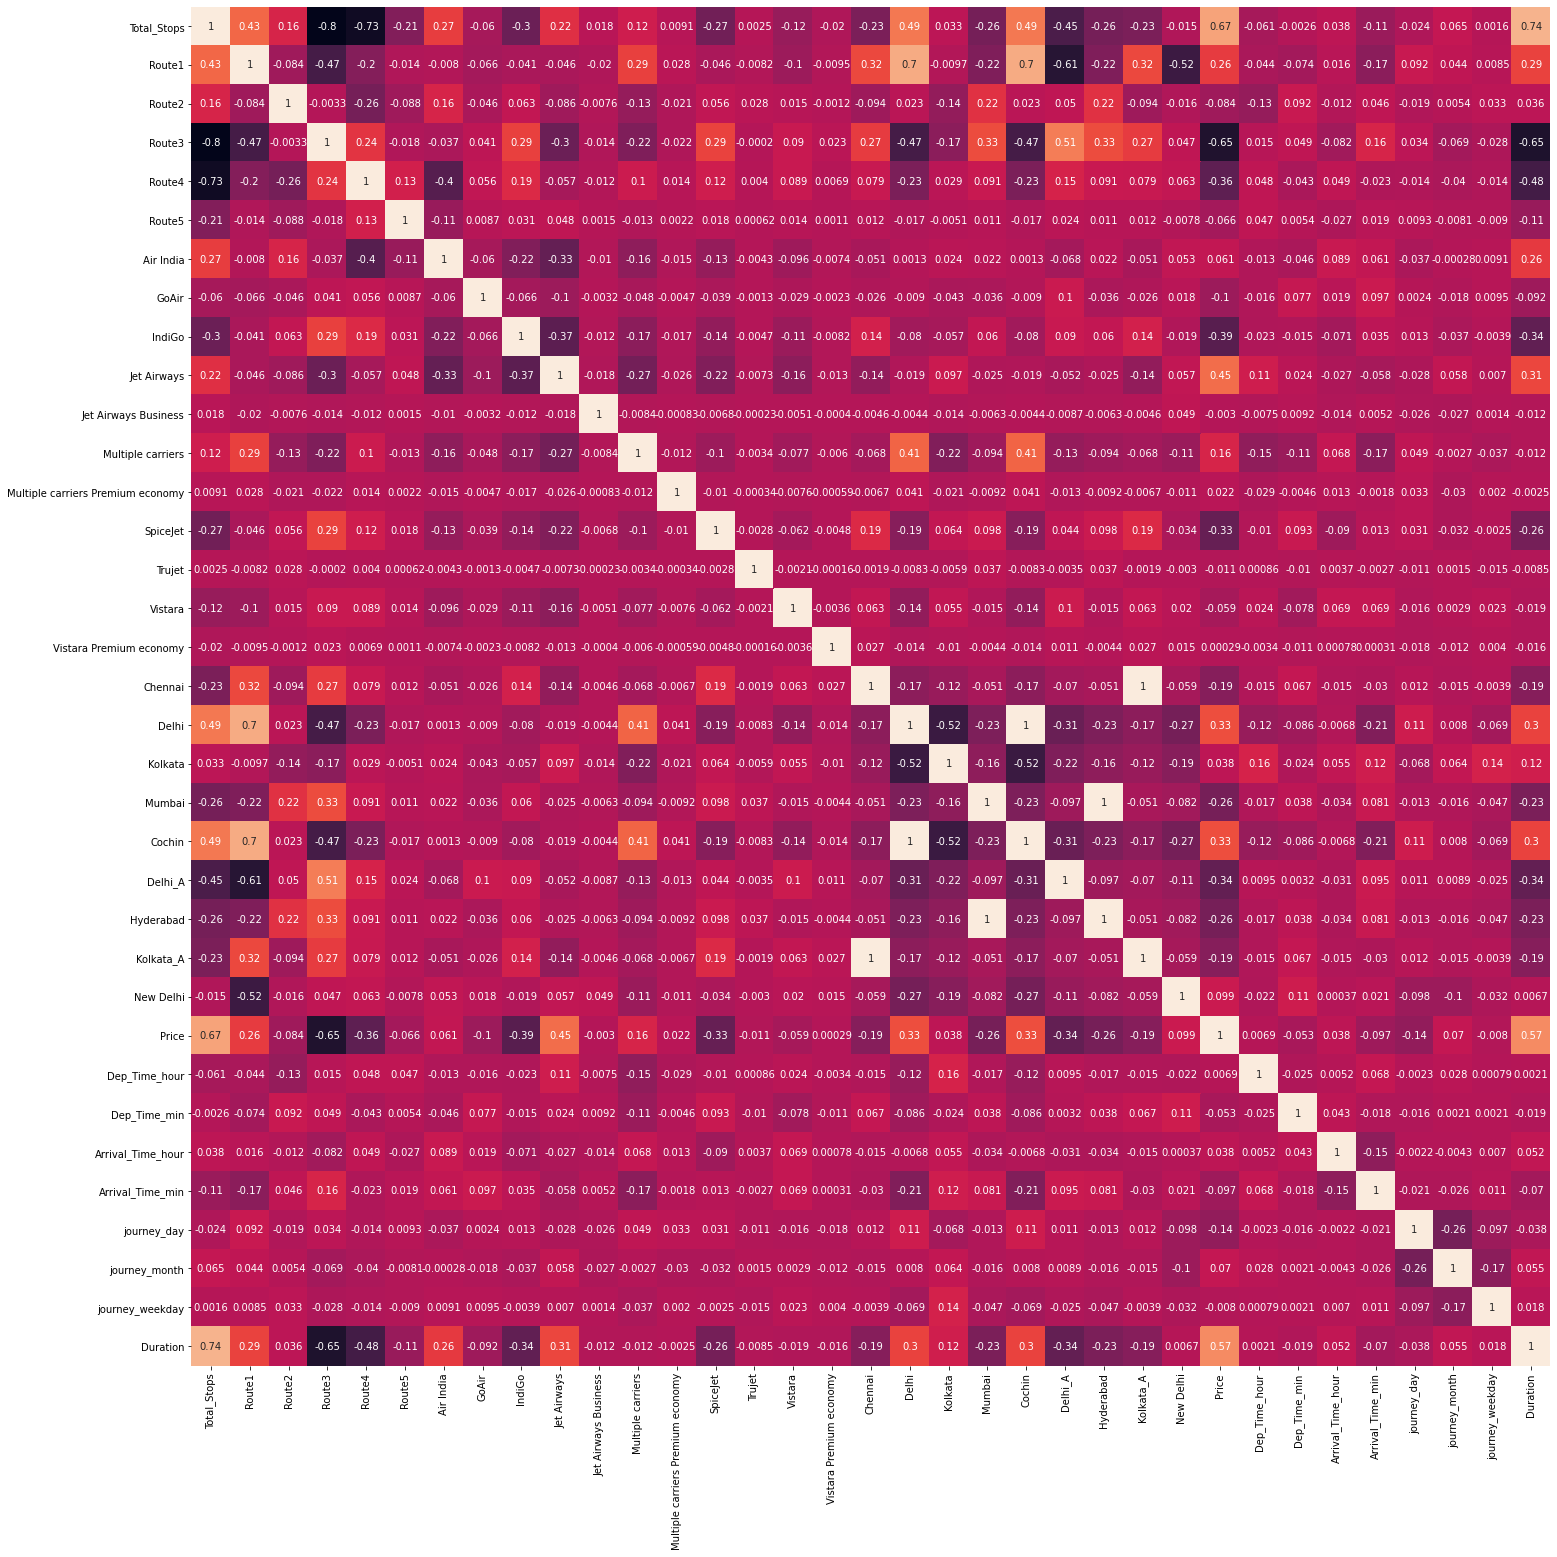

In [ ]:
plt.figure(figsize = (25,25))
sns.heatmap(final_df.corr(),annot=True,square=True,cbar=False)
plt.show()

In [ ]:
final_df[final_df.columns[0:]].corr()['Price'][:].sort_values(ascending=False)
# df.sort_values('Price',ascending=False)

Price                                1.000000
Total_Stops                          0.665288
Duration                             0.570122
Jet Airways                          0.448122
Delhi                                0.332357
Cochin                               0.332357
Route1                               0.264372
Multiple carriers                    0.161073
New Delhi                            0.099037
journey_month                        0.069765
Air India                            0.061393
Kolkata                              0.038459
Arrival_Time_hour                    0.037648
Multiple carriers Premium economy    0.021761
Dep_Time_hour                        0.006949
Vistara Premium economy              0.000286
Jet Airways Business                -0.003050
journey_weekday                     -0.007955
Trujet                              -0.011352
Dep_Time_min                        -0.053187
Vistara                             -0.058658
Route5                            

As we can see from the table, there are several features that have approx 0 value,so we should remove it after authorizing it.But for now,we are not removing it.

# Models

In [ ]:
# spiliting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
 
    sns.distplot(y_test-predictions)      
    plt.figure(figsize=(10,10))
    plt.scatter(y_test, predictions, c='crimson')
    plt.yscale('log')
    plt.xscale('log')

    p1 = max(max(predictions), max(y_test))
    p2 = min(min(predictions), min(y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()
          

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor


Model is: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Training score: 0.9472222720532107
Predictions are: [ 8675.03       17155.49       13230.87666667 ...  3863.78
  5902.88       10558.588     ]


r2 score is: 0.8137857462124822
MAE:1079.8454277317599
MSE:2920796.6492390973
RMSE:1709.033835018809


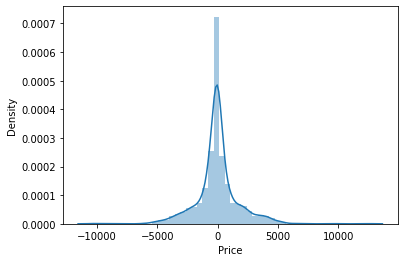

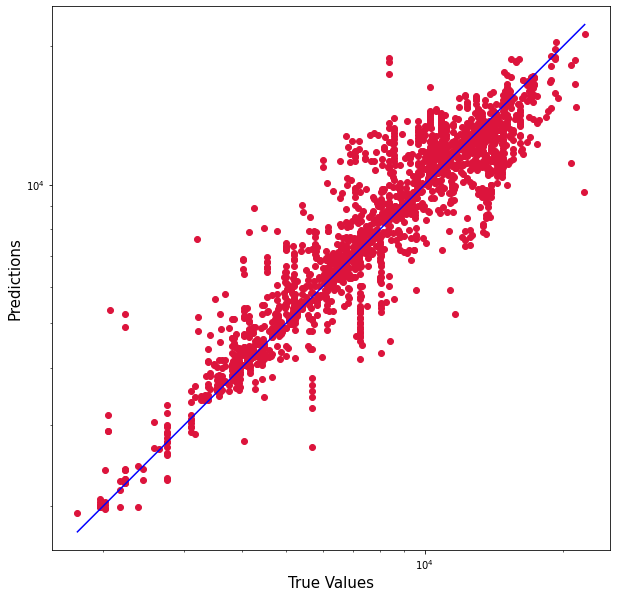

In [ ]:

predict(RandomForestRegressor())

Model is: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Training score: 0.07244002340550029
Predictions are: [10844. 10844. 10844. ... 14781. 10262. 10844.]


r2 score is: 0.28111156320809305
MAE:2543.957416939635
MSE:11275865.8086102
RMSE:3357.955599559083


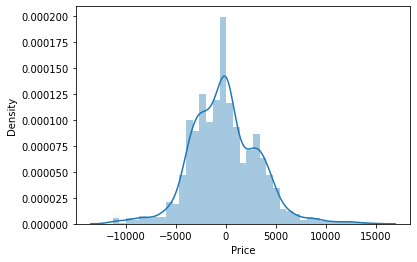

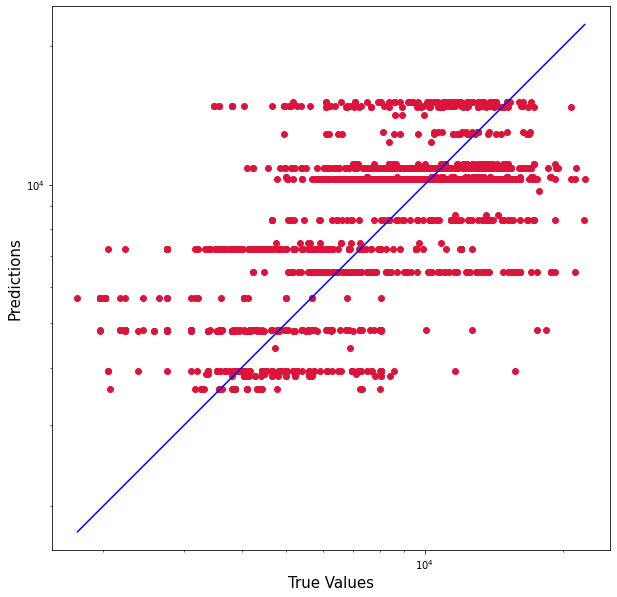

In [ ]:
predict(LogisticRegression())


Model is: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
Training score: 0.7644434975285824
Predictions are: [ 8355.4 10980.2 12975.2 ...  4210.   8408.  14122.2]


r2 score is: 0.6446003189112477
MAE:1642.331305568554
MSE:5574493.770219934
RMSE:2361.0365880731147


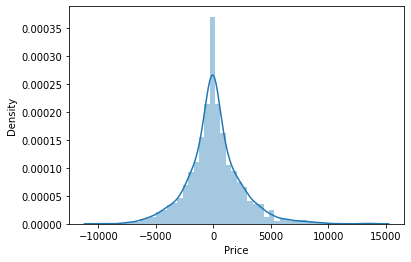

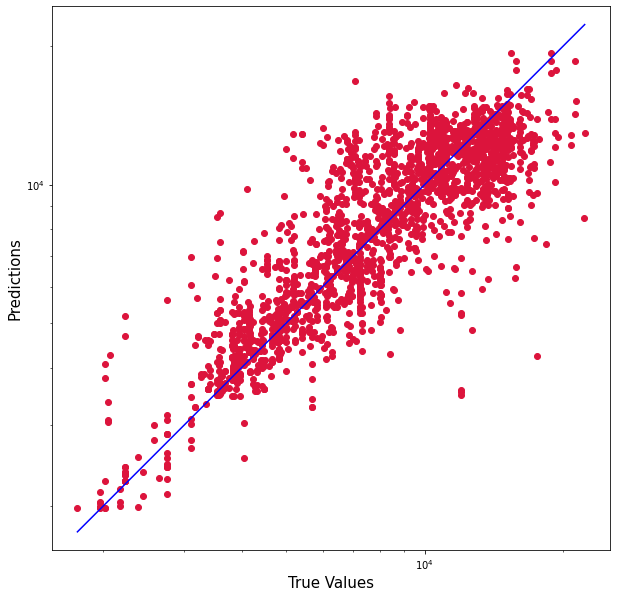

In [ ]:
predict(KNeighborsRegressor())


Model is: DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
Training score: 0.96080479759243
Predictions are: [ 8996. 15400. 14571. ...  4205.  6069. 10262.]


r2 score is: 0.6975043669200787
MAE:1246.7800655124006
MSE:4744686.36819529
RMSE:2178.230099919494


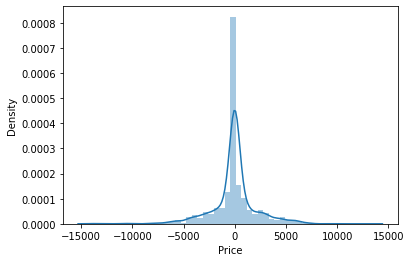

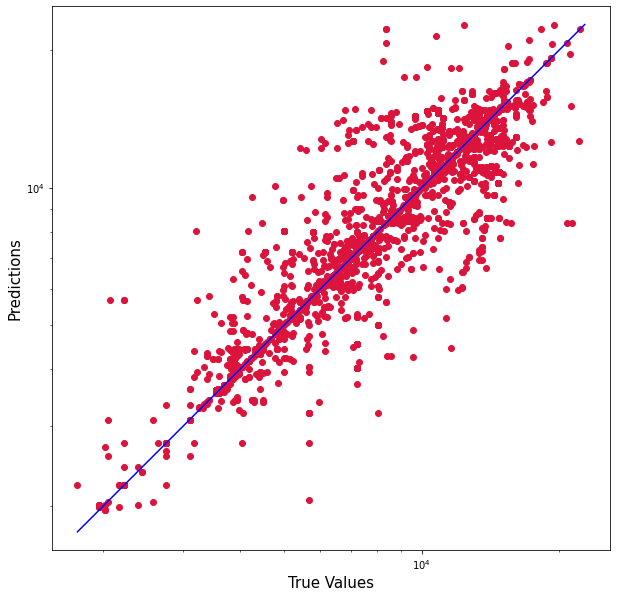

In [ ]:
predict(DecisionTreeRegressor())

Model is: GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
Training score: 0.7867718917728029
Predictions are: [ 5752.63148852 16372.51585623 12188.14102689 ...  4768.53596036
  6628.27806811 11921.35344547]


r2 score is: 0.7799933382779655
MAE:1379.4185667146655
MSE:3450835.300187273
RMSE:1857.642403743862


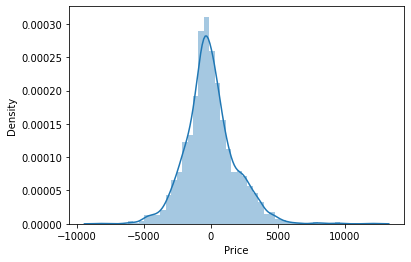

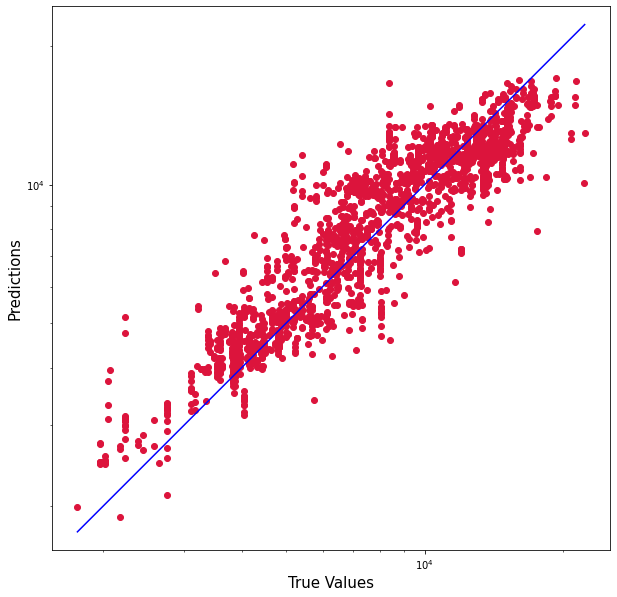

In [ ]:
predict(GradientBoostingRegressor())

Model is: SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Training score: 0.5583832723714759
Predictions are: [ 9850.1843124  10636.97863024 10477.25067035 ...  7872.41198246
  8339.99200275 10771.68739864]


r2 score is: 0.5555209618274464
MAE:1932.2646292140778
MSE:6971715.961296802
RMSE:2640.4007198334125


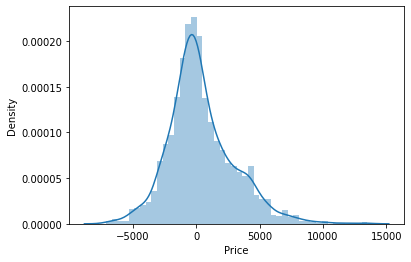

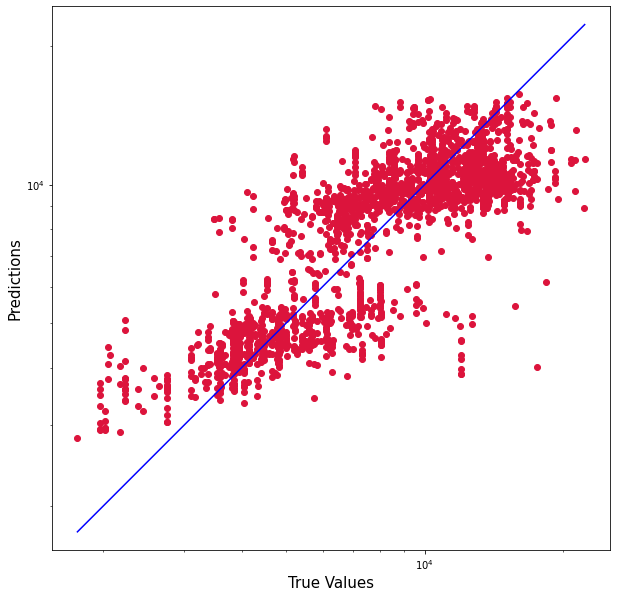

In [ ]:
predict(SVR(kernel='linear'))

# Hypertunning the model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(X_train,y_train)

# best parameter

rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   57.9s finished


{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 220}

In [ ]:
# best parameter
rf_random.best_params_

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 220}

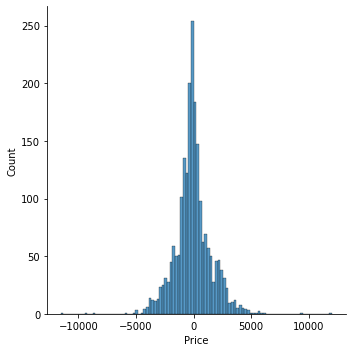

In [ ]:
#predicting the values
predicted_value = rf_random.predict(X_test)

#distribution plot between actual value and predicted value
sns.displot(y_test-prediction)

In [ ]:
r2_score(y_test,prediction)

0.8375882798185013

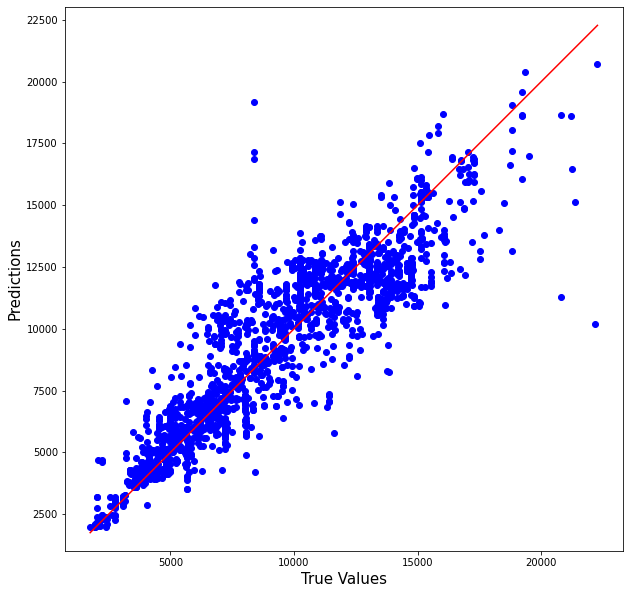

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, predicted_value, c='blue')


p1 = max(max(predicted_value), max(y_test))
p2 = min(min(predicted_value), min(y_test))
plt.plot([p1, p2], [p1, p2], 'r-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

## After hypertuning,the accuracy increases .


In [ ]:
import xgboost as xg
xgb=xg.XGBRegressor()

In [ ]:
xgb.fit(X_train,y_train)

[19:11:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
predicted_value=xgb.predict(X_train)

array([ 2480.015 , 11384.523 ,  9322.707 , ...,  8776.073 , 11551.611 ,
        2639.3804], dtype=float32)

In [ ]:
xgb.score(X_test,y_test)

0.779783278371136

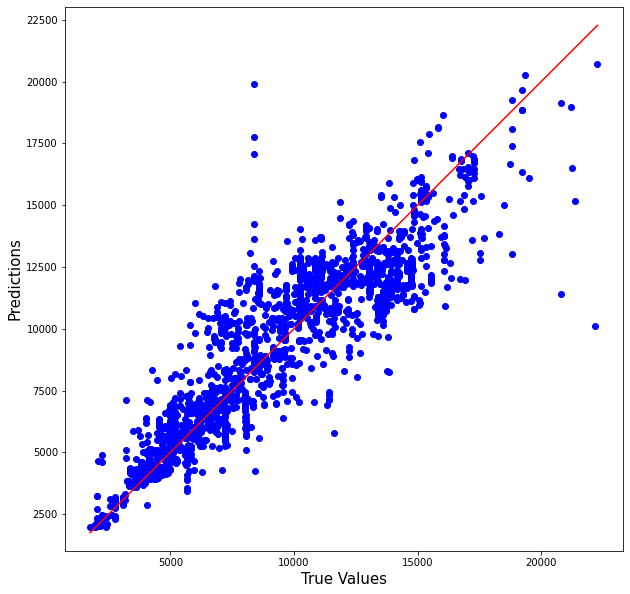

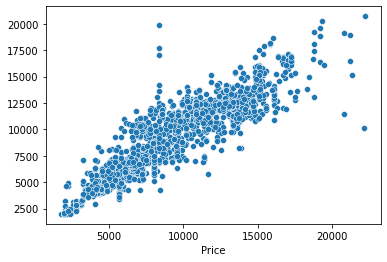